In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

/home/paul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [192]:
def swap_process(graph):
    """
    not the most efficient, but at this point i don't care
    makes a random cut, while there are unhappy vertices switches them
    returns true if got an internal cut, false if everybody is on one side
    """
    
    num_vxs = graph.number_of_nodes()
    adj_matrix = nx.to_numpy_array(graph, nodelist=range(num_vxs))
    
    cut = np.random.choice([-1, 1], size=num_vxs)
    balances = (adj_matrix @ cut) * cut
    unbalanced_indices = (balances < 0).nonzero()[0]

    while unbalanced_indices.size != 0:
        swap_index = np.random.choice(unbalanced_indices)
        cut[swap_index] *= -1
        # balances = (adj_matrix @ cut) * cut
        balances[swap_index] *= -1
        if cut[swap_index] == 1:
            balances += adj_matrix[:, swap_index] * 2 * cut
        else:
            balances -= adj_matrix[:, swap_index] * 2 * cut
        
        unbalanced_indices = (balances < 0).nonzero()[0]

    return not(np.all(cut == 1) or np.all(cut == -1))

In [226]:
def measure_success_probability(d, num_vxs, num_tests, silent=True):
    num_successes = 0

    for i in range(num_tests):
        if i % 1000 == 0 and not silent:
            print(f'i: {i}, num_successes: {num_successes}')

        graph = nx.random_regular_graph(d, num_vxs)
        if (swap_process(graph)):
            num_successes += 1

    return num_successes / num_tests

In [245]:
def measure_erdos_renyi(p, num_vxs, num_tests, silent=True):
    num_successes = 0

    for i in range(num_tests):
        if i % 1000 == 0 and not silent:
            print(f'i: {i}, num_successes: {num_successes}')

        graph = nx.erdos_renyi_graph(num_vxs, p)
        if (swap_process(graph)):
            num_successes += 1

    return num_successes / num_tests

In [ ]:
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
probas_3 = []
probas_4 = []
probas_5 = []
probas_6 = []
probas_7 = []
num_tests = 10000

for size in sizes:
    print(f'size: {size}')
    probas_3.append(measure_success_probability(3, size, num_tests, silent=False))
    probas_4.append(measure_success_probability(4, size, num_tests, silent=False))
    probas_5.append(measure_success_probability(5, size, num_tests, silent=False))
    probas_6.append(measure_success_probability(6, size, num_tests, silent=False))
    probas_7.append(measure_success_probability(7, size, num_tests, silent=False))

print(sizes)
print(probas_3)
print(probas_4)
print(probas_5)
print(probas_6)
print(probas_7)

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='d = 3')
plt.plot(sizes, probas_4, label='d = 4')
plt.plot(sizes, probas_5, label='d = 5')
plt.plot(sizes, probas_6, label='d = 6')
plt.plot(sizes, probas_7, label='d = 7')
plt.legend();
plt.savefig('success_probability_extended.png')

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
plt.xscale('log')
plt.plot(sizes[:14], probas_3, label='d = 3')
plt.plot(sizes[:14], probas_4, label='d = 4')
plt.plot(sizes[:14], probas_5, label='d = 5')
plt.plot(sizes[:14], probas_6, label='d = 6')
plt.plot(sizes[:14], probas_7, label='d = 7')
plt.title('d-regular graphs')
plt.legend();
plt.savefig('success_probability_extended.png')

size: 10
i: 0, num_successes: 0
i: 1000, num_successes: 953
i: 2000, num_successes: 1897
i: 3000, num_successes: 2854
i: 4000, num_successes: 3801
i: 5000, num_successes: 4753
i: 6000, num_successes: 5700
i: 7000, num_successes: 6645
i: 8000, num_successes: 7596
i: 9000, num_successes: 8539
i: 0, num_successes: 0
i: 1000, num_successes: 77
i: 2000, num_successes: 159
i: 3000, num_successes: 241
i: 4000, num_successes: 336
i: 5000, num_successes: 427
i: 6000, num_successes: 516
i: 7000, num_successes: 613
i: 8000, num_successes: 711
i: 9000, num_successes: 796
i: 0, num_successes: 0
i: 1000, num_successes: 93
i: 2000, num_successes: 176
i: 3000, num_successes: 289
i: 4000, num_successes: 369
i: 5000, num_successes: 441
i: 6000, num_successes: 524
i: 7000, num_successes: 617
i: 8000, num_successes: 691
i: 9000, num_successes: 768
size: 20
i: 0, num_successes: 0
i: 1000, num_successes: 962
i: 2000, num_successes: 1931
i: 3000, num_successes: 2905
i: 4000, num_successes: 3871
i: 5000, num_

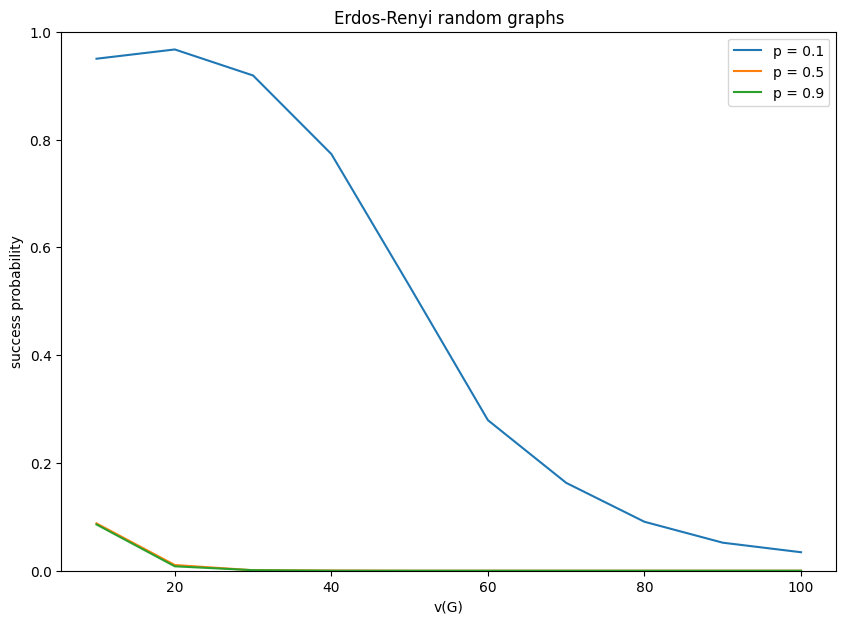

In [251]:
#sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
sizes = np.arange(10, 101, 10).astype(int)

probas_01 = []
probas_05 = []
probas_09 = []
num_tests = 10000

for size in sizes:
    print(f'size: {size}')
    probas_01.append(measure_erdos_renyi(0.1, size, num_tests, silent=False))
    probas_05.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))
    probas_09.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))

print(sizes)
print(probas_01)
print(probas_05)
print(probas_09)

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
# plt.xscale('log')
plt.plot(sizes, probas_01, label='p = 0.1')
plt.plot(sizes, probas_05, label='p = 0.5')
plt.plot(sizes, probas_09, label='p = 0.9')
plt.title('Erdos-Renyi random graphs')
plt.legend();
plt.savefig('success_probability_erdos_renyi.png')

In [218]:
measure_success_probability(5, 10000, 100, silent=False)

i: 0, num_successes: 0


0.99

In [219]:
measure_success_probability(5, 1000, 100, silent=False)

i: 0, num_successes: 0


0.62

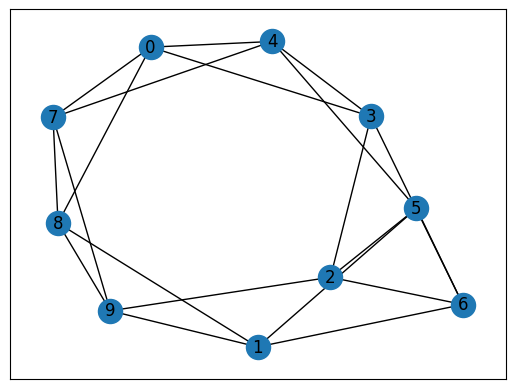

In [190]:
d = 4
n = 10
graph = nx.random_regular_graph(d, n)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [191]:
swap_process(graph)

[-1  1  1  1 -1  1  1 -1 -1 -1] [ 2.  0.  2.  0. -0.  2.  4.  4.  2. -0.]


True